In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import os 
import tensorflow as tf
import cv2 
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_dir="C://Users//Basel Bakeer//Desktop//AI associate training notebooks//Brain tumer mri//Train"
imgexts=['jpg','png','jpeg','pmb']

In [4]:
os.listdir(data_dir)


['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

checking if directory is valid 

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in imgexts:
                print('image not in extension list '.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image '.format(image_path))

issue with image 
issue with image 
issue with image 
issue with image 
issue with image 
issue with image 
issue with image 
issue with image 


Reading and Preprocessing Data 

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'  
)
test_data = tf.keras.utils.image_dataset_from_directory(
    "C://Users//Basel Bakeer//Desktop//AI associate training notebooks//Brain tumer mri//Val",
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'  
)

# Preprocess data
def preprocess(image, label):
    image = image / 255.0  
    return image, label

test_data = test_data.map(preprocess)
train_data = train_data.map(preprocess)

Found 4737 files belonging to 4 classes.
Found 512 files belonging to 4 classes.


In [8]:
data_iterator=train_data.as_numpy_iterator() 


In [9]:
batch=data_iterator.next()


In [10]:
batch[0]

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]

In [12]:
len(train_data)

149

Splitting Data 

In [13]:
train_size=int(len(train_data))
val_size=int(len(test_data)*.8)
test_size=int(len(test_data)*.2)

In [15]:
train=train_data.take(train_size)
val = test_data.take(val_size)
test=test_data.take(test_size)

Model Building

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization, Activation


In [17]:
early_stopping = EarlyStopping(
    monitor='val_loss',     
    patience=3,            
    verbose=1,              
    restore_best_weights=True 
)

In [18]:
model = Sequential()
model.add(Conv2D(64,(3,3),1,activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),1,activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                        

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
logdir="Data"
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)


Model Training

In [22]:
hist=model.fit(train,epochs=10,validation_data=val, callbacks=[tensorboard_callback, early_stopping]
)


Epoch 1/10
149/149 [==============================] - 28s 180ms/step - loss: 0.8536 - accuracy: 0.6981 - val_loss: 1.1463 - val_accuracy: 0.7604
Epoch 2/10
149/149 [==============================] - 26s 174ms/step - loss: 0.3959 - accuracy: 0.8423 - val_loss: 0.7749 - val_accuracy: 0.7448
Epoch 3/10
149/149 [==============================] - 26s 177ms/step - loss: 0.2361 - accuracy: 0.9141 - val_loss: 0.4055 - val_accuracy: 0.8880
Epoch 4/10
149/149 [==============================] - 26s 175ms/step - loss: 0.1153 - accuracy: 0.9582 - val_loss: 0.3549 - val_accuracy: 0.8646
Epoch 5/10
149/149 [==============================] - 26s 175ms/step - loss: 0.0530 - accuracy: 0.9825 - val_loss: 0.1883 - val_accuracy: 0.9401
Epoch 6/10
149/149 [==============================] - 26s 175ms/step - loss: 0.0390 - accuracy: 0.9856 - val_loss: 0.2851 - val_accuracy: 0.9089
Epoch 7/10
149/149 [==============================] - 26s 175ms/step - loss: 0.2262 - accuracy: 0.9158 - val_loss: 0.5636 - val_ac

plotting measures 

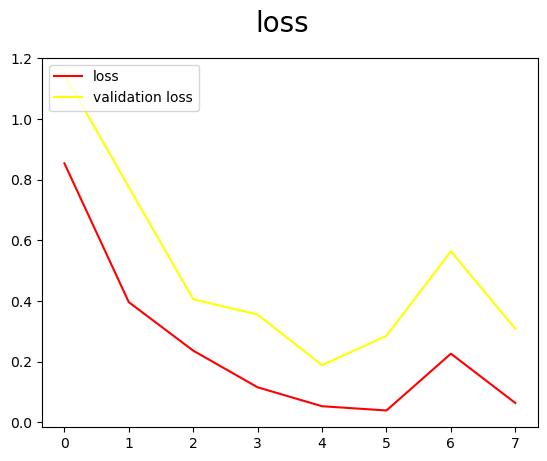

In [23]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='yellow',label='validation loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

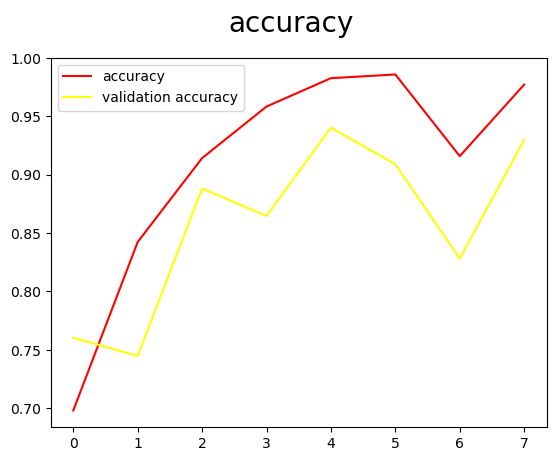

In [24]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='yellow',label='validation accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [25]:
y_true = []
y_pred = []

for images, labels in test_data:
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 [==============================] - 0s 57ms/step


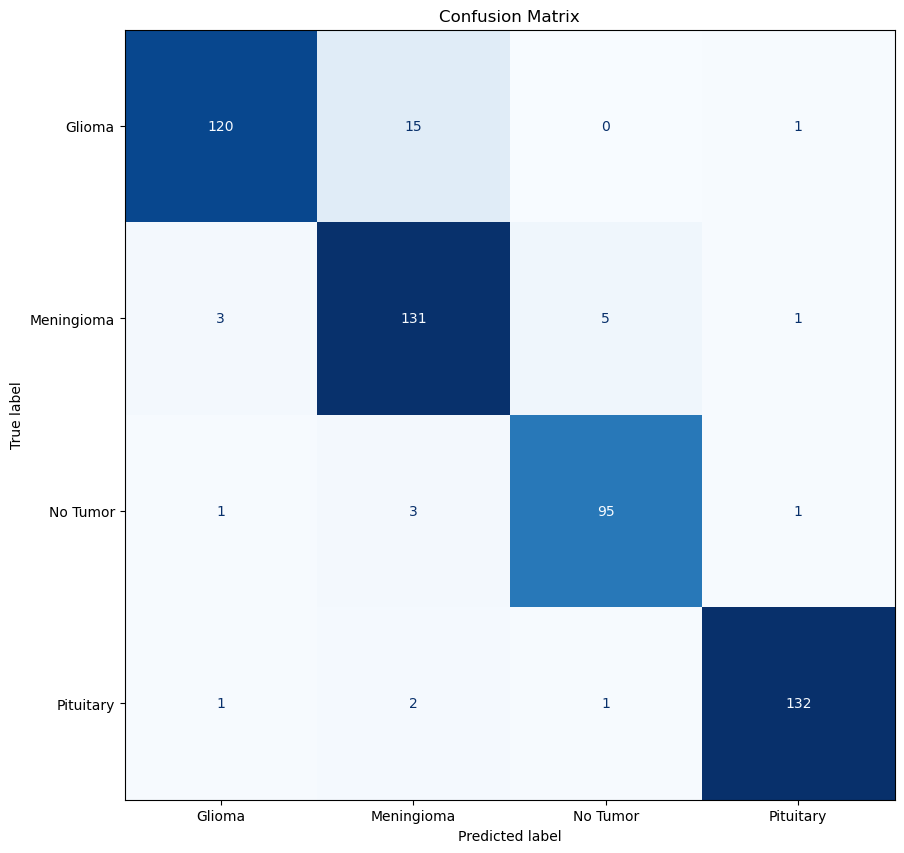

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']  

cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(class_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix')
plt.show()

Testing Model on Random image from Internet

1/1 [==============================] - 0s 19ms/step
Predicted Class: No Tumor


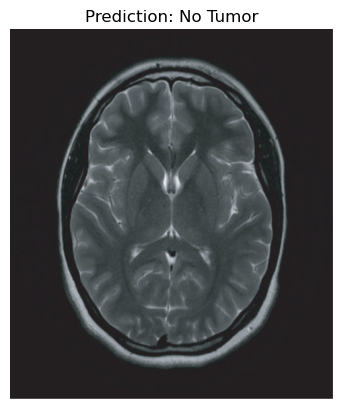

In [31]:

def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

test_img_path = "C://Users//Basel Bakeer//Downloads//Brain-tumor-dataset-a-no-tumor-and-b-brain-tumor.png"
preprocessed_img = load_and_preprocess_image(test_img_path)

predictions = model.predict(preprocessed_img)
predicted_class_index = np.argmax(predictions, axis=1)
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']  
predicted_class_name = class_names[predicted_class_index[0]]

print(f"Predicted Class: {predicted_class_name}")

img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

plt.imshow(img)
plt.title(f"Prediction: {predicted_class_name}")
plt.axis('off')
plt.show()
